# Emcee Result Checker

Simple notebook to check the walkers and corner plot of an emcee sampler result.  

Provide the .h5 file from the emcee backend functionality and run the functions below.

In [1]:
import emcee
import matplotlib.pyplot as plt
import corner

In [10]:
def plot_walkers(samples_data, param_labels, label_kwrgs=""):

    # Setup parameter labels
    num_parameters = len(param_labels)

    fig, axes = plt.subplots(num_parameters, figsize=(10, 7), sharex=True)
    
    fig.suptitle('Positions of walkers: {}'.format(label_kwrgs), fontsize=18, y= 0.95)

    for i in range(num_parameters):

        ax = axes[i]

        # Steps, walkers, parameter
        ax.plot(samples_data[:, :, i], "k", alpha=0.3)
        ax.set_xlim(0, len(samples_data))
        ax.set_ylabel(param_labels[i])
        ax.yaxis.set_label_coords(-0.1, 0.5)                                                 
        axes[-1].set_xlabel("Step number")

    #plt.savefig("Walkers_Plt_05052021", dpi=300)
    plt.show()

def display_emcee_results(file, label_kwrgs=""):

    
    param_labels = ['f', 'gamma', 'rs']
    reader = emcee.backends.HDFBackend(file, read_only=True)
    samples_data = reader.get_chain()

    print("Samples shape (steps, walkers, params): {}".format(samples_data.shape))
    plot_walkers(samples_data, param_labels, label_kwrgs)

    flat_samples = reader.get_chain(discard=200, flat=True)
    print("Flattened samples shape (steps x walkers, params): {}".format(flat_samples.shape))

    corner.corner(flat_samples, labels=param_labels)


In [ ]:
filename = "/scratch/sven/exoplanet_emcee_logs/emcee_N100000_sigma0.2_f1.0gamma1.1rs10.0v1.h5"
display_emcee_results(filename)

In [ ]:
filename = "/scratch/sven/exoplanet_emcee_logs/ver2_emcee_N100000_sigma0.2_f1.0gamma1.1rs10.0v1.h5"
display_emcee_results(filename)

Samples shape (steps, walkers, params): (6000, 150, 3)


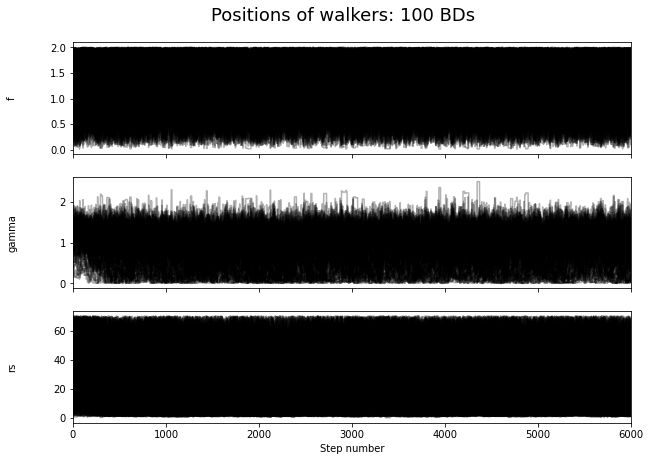

Flattened samples shape (steps x walkers, params): (870000, 3)


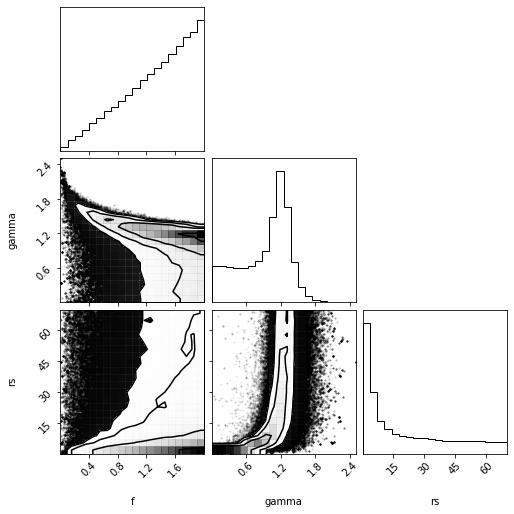

In [17]:
filename = "/home/sven/repos/exoplanets/walkers__N100_sigma0.2_f1.0gamma1.2rs20.0v1.h5"
label_kwrgs = "100 BDs"
display_emcee_results(filename, label_kwrgs)

Samples shape (steps, walkers, params): (6000, 150, 3)


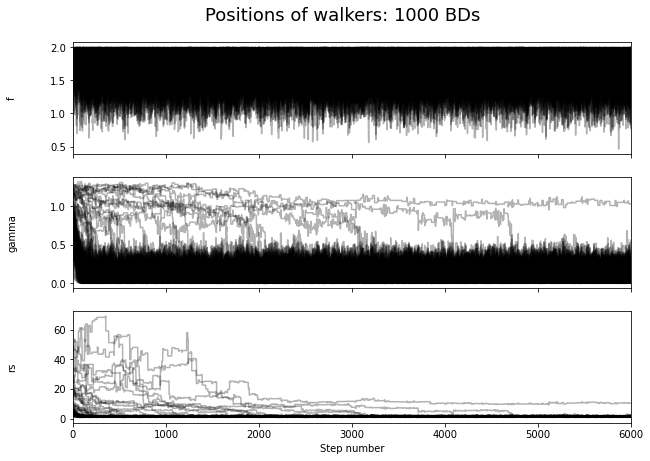

Flattened samples shape (steps x walkers, params): (870000, 3)


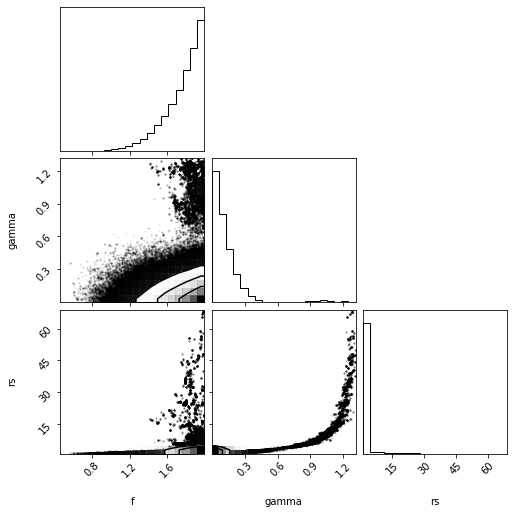

In [19]:
filename = "/home/sven/repos/exoplanets/walkers__N1000_sigma0.2_f1.0gamma1.2rs20.0v1.h5"
label_kwrgs = "1000 BDs"
display_emcee_results(filename, label_kwrgs)

---

Samples shape (steps, walkers, params): (6000, 150, 3)


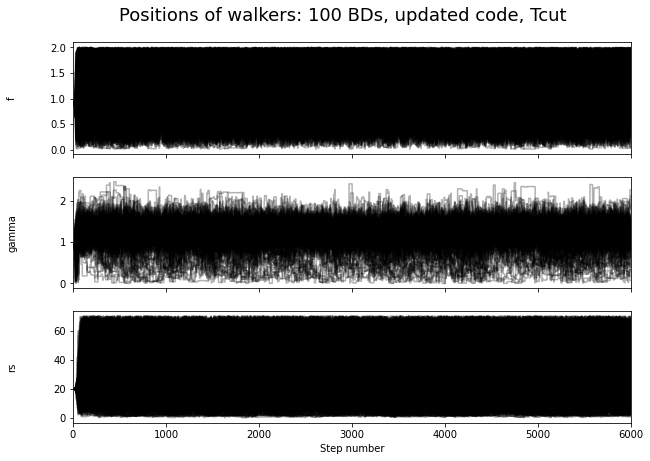

Flattened samples shape (steps x walkers, params): (870000, 3)


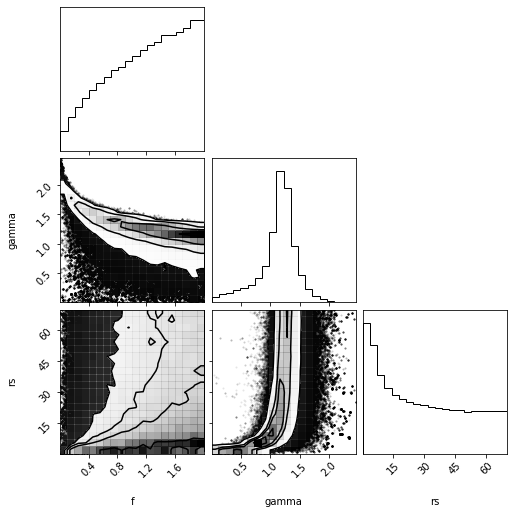

In [13]:
# Likelihood with added pi term
filename = "/home/sven/repos/exoplanets/walkers_likelihood_test_Tcut_N100_sigma0.2_f1.0gamma1.2rs20.0v42.h5"
label_kwrgs = "100 BDs, updated code, Tcut"
display_emcee_results(filename, label_kwrgs)

Samples shape (steps, walkers, params): (6000, 300, 3)


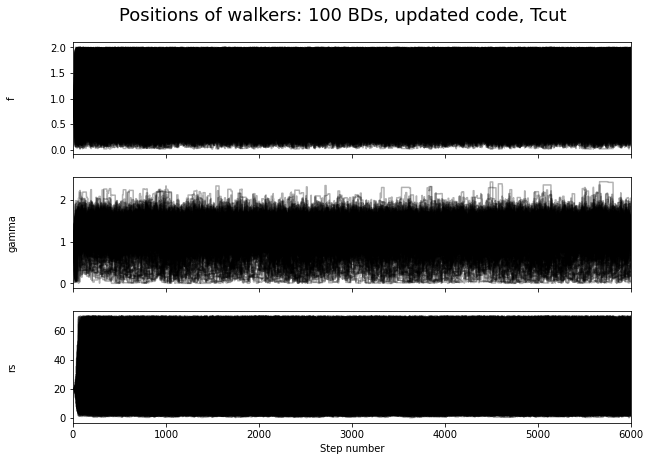

Flattened samples shape (steps x walkers, params): (1740000, 3)


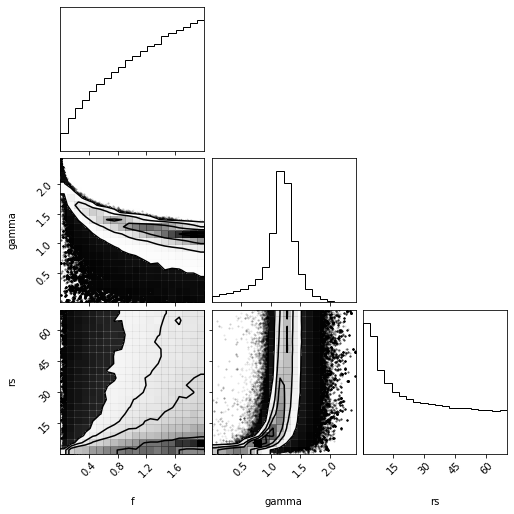

In [14]:
# Testing 300 walkers
# Likelihood with added pi term
filename = "/home/sven/repos/exoplanets/walkers_Tcut_300walkers_N100_sigma0.2_f1.0gamma1.2rs20.0v42.h5"
label_kwrgs = "100 BDs, updated code, Tcut"
display_emcee_results(filename, label_kwrgs)

Samples shape (steps, walkers, params): (6000, 150, 3)


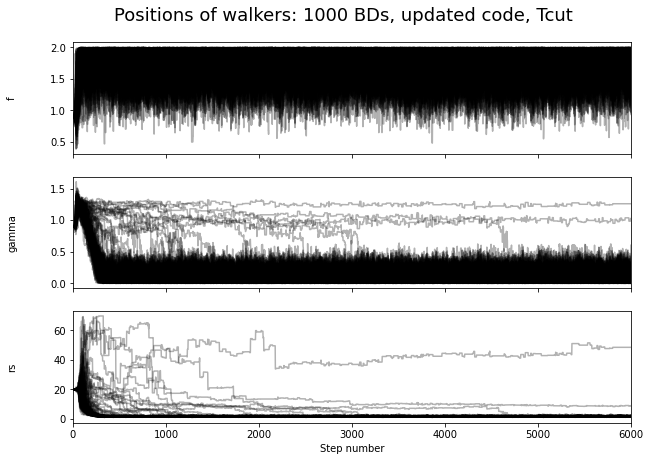

Flattened samples shape (steps x walkers, params): (870000, 3)


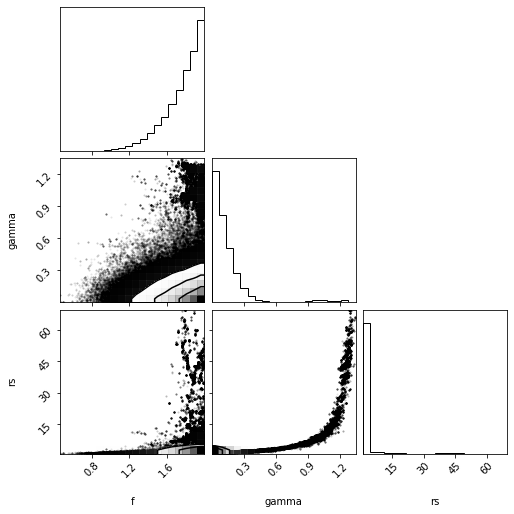

In [12]:
# Likelihood with added pi term
filename = "/home/sven/repos/exoplanets/walkers_Tcut_N1000_sigma0.2_f1.0gamma1.2rs20.0v1.h5"
label_kwrgs = "1000 BDs, updated code, Tcut"
display_emcee_results(filename, label_kwrgs)